# Regression

Guillermo Cabrera

guillecabrera@inf.udec.cl

Regression is a special case of supervised learning. Recall the definition of supervised learning:

Given a training set $\{(\boldsymbol{x}_1,y_1),(\boldsymbol{x}_2,y_2),\cdots, (\boldsymbol{x}_N,y_N)\}$, we want to determine a learning function $f : X\rightarrow Y$  that predicts the output value of new data as $y = f(\boldsymbol{x})$. $\boldsymbol{x}_i\in X$ are vectors usually called features or attributes, and $y_i\in Y$. When $Y= \mathbb{R}$ we call it regression.

Lets see a toy regression problem: we'll see the dependency of galaxy distances with respect to the redshift using Supernovae data. For this, we have already downloaded a dataset for supernovae from the "Supernova Cosmology Project":http://supernova.lbl.gov/Union/ that contains redshifts, distance modulus, and errors. The distance modulus $\mu = m - M$ is basically the difference between the apparent magnitude $m$ (ideally, corrected from the effects of interstellar absorption) and the absolute magnitude $M$ of an astronomical object, and is related to the distance in parsecs $d$ as $\log_{10}(d) = 1 - \frac{\mu}{5}$. This data is useful to regress the Lambda cold dark matter model, which is a parametrization of the Big Bang cosmological model.

We will play with this data and try different regression algorithms.


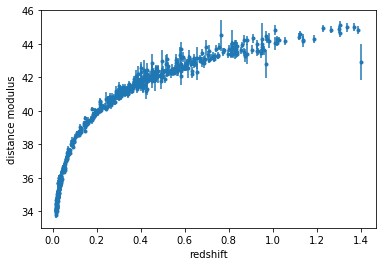

In [113]:
%matplotlib inline

import sys
import numpy as np
import pylab as pl
import pandas as pd

df = pd.read_csv("data/Supernovae.csv")

pl.clf()
pl.errorbar(df['z'], df['mu'],fmt = ".", yerr = df['sigma_mu'])
pl.xlabel ("redshift")
pl.ylabel("distance modulus")

One approach is to do a polynomial regression using a least squares polynomial fit.

$\hat{f}(x) = \sum{\theta_i x^i}$

For the sake of explaining the concepts, we will only use a limited number of data points N_small.

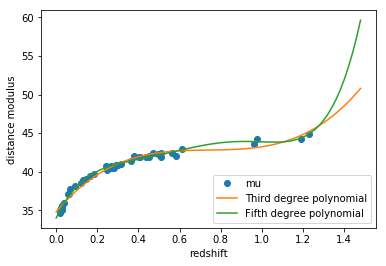

In [114]:
i_s = np.arange(len(df['z']))
np.random.seed(0)
np.random.shuffle(i_s)
z = df['z'][i_s]
mu = df['mu'][i_s]
s_mu = df['sigma_mu'][i_s]

N_small = 50
z_sm = z[:N_small]
mu_sm = mu[:N_small]
s_mu_sm = s_mu[:N_small]
# Least squares polynomial fit.
p3 = np.polyfit(z_sm, mu_sm, 3)
x = np.arange(0, 1.5, 0.02)
p3 = np.poly1d (p3)
y3 = p3(x)

p5 = np.polyfit(z_sm, mu_sm, 5)
p5 = np.poly1d (p5)
y5 = p5(x)

pl.clf()
#pl.plot(z, mu,"o", markersize = 3, alpha = 0.5)
pl.plot(z_sm, mu_sm,"o")
pl.plot(x, y3, label = "Third degree polynomial")
pl.plot(x, y5, label = "Fifth degree polynomial")
pl.xlabel ("redshift")
pl.ylabel("distance modulus")
pl.legend(loc = "lower right")
pl.show()



## Nonparametric Regression

Nonparametric regression relaxes the assumption of linearity, substituting the much weaker assumption of a smooth population regression function. Some nonparametric regression models are:
* *K nearest neighbors regression*
* *Kernel Regression*
* Local Polynomial Regression
* Basis Methods
* *Gaussian Process Regression*
* *Random Forest Regression*

### K-NN Regression

* The K nearest neighbors algorithm (K-NN) is a non-parametric method used for classification and regression.
* For a coordinate $\boldsymbol{x}$ we calculate the $K$ nearest neighbors.
* The value of $\hat{f}(\boldsymbol{x})$ is calculated as the mean of the values $y_k$ of the $K$ nearest data points.
\begin{equation}
\hat{f}(\boldsymbol{x}) = \frac{1}{K}\sum_{k\in N_K(\boldsymbol{x})}y_k
\end{equation}

(50, 1) (50, 1)


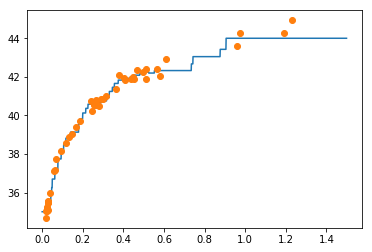

In [118]:
from sklearn.neighbors import KNeighborsRegressor

X = z_sm[:, np.newaxis]
y = mu_sm[:, np.newaxis]
x = np.arange(0, 1.5, 0.001)
x_grid = x[:, np.newaxis]

K = 5
print X.shape, y.shape

knn = KNeighborsRegressor(K)
knn.fit (X, y)
y_grid = knn.predict(x_grid)

pl.clf()
pl.plot (x_grid, y_grid)
pl.plot (X[:,0], y[:, 0], "o")
pl.show()


But how do we choose K?

* Cross validation

In [119]:
from sklearn.model_selection import ShuffleSplit, GridSearchCV

ss = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
K_range = np.arange(1, 20)
param_grid = dict(n_neighbors = K_range)
grid = GridSearchCV (KNeighborsRegressor(), cv = ss, 
                     param_grid = param_grid)
grid.fit (X, y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=None),
       error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

['rank_test_score', 'split6_test_score', 'param_n_neighbors', 'split7_train_score', 'split0_train_score', 'split2_test_score', 'mean_fit_time', 'split3_train_score', 'split6_train_score', 'split9_test_score', 'std_test_score', 'params', 'split8_test_score', 'std_score_time', 'std_fit_time', 'std_train_score', 'split4_test_score', 'split1_train_score', 'split2_train_score', 'split4_train_score', 'mean_score_time', 'split9_train_score', 'split5_test_score', 'mean_train_score', 'split8_train_score', 'split7_test_score', 'split0_test_score', 'mean_test_score', 'split3_test_score', 'split5_train_score', 'split1_test_score']
[0.98604025 0.98983875 0.98771744 0.98639783 0.9772826  0.9696894
 0.96636674 0.95564898 0.94773007 0.94214962 0.92661282 0.91273836
 0.89171715 0.86963494 0.85105948 0.83366353 0.80795228 0.78711731
 0.76082425]


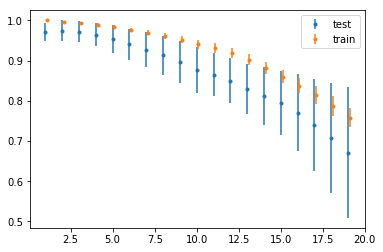

In [120]:
print grid.cv_results_.keys()

# Print the scores for each K of split # 6 
print grid.cv_results_['split6_test_score']

# We extract the mean scores and stdev for each K
scores_m_test = grid.cv_results_['mean_test_score']
scores_s_test = grid.cv_results_['std_test_score']
scores_m_train = grid.cv_results_['mean_train_score']
scores_s_train = grid.cv_results_['std_train_score']

pl.clf()
pl.errorbar (K_range, scores_m_test, yerr = scores_s_test, fmt = '.', label = "test")
pl.errorbar (K_range+0.1, scores_m_train, yerr = scores_s_train, fmt = '.', label = "train")
pl.legend(loc = "best")
pl.show()

What is this score?


Coefficient of determination: $R^2 = 1 - SS_\mathrm{res}/SS_\mathrm{tot}$,

where

$SS_\mathrm{res} = \sum_{i=1}^N (\hat{f}(x_i) - y_i)^2$

$SS_\mathrm{tot} = \sum_{i=1}^N (\bar{y} - y_i)^2$

$\bar{y} = \frac{1}{N}\sum_{i=1}^N y_i$

In [15]:
# But what is the best estimator?

print grid.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')


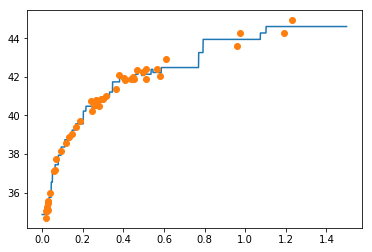

In [16]:
knn = grid.best_estimator_
knn.fit (X, y)
y_grid = knn.predict(x_grid)

pl.clf()
pl.plot (x_grid, y_grid)
pl.plot (X[:,0], y[:, 0], "o")
pl.show()

### Kernel Regression 

The main idea behind kernel regression is to estimate the regressed function giving more importance to data points closer to the desired coordinate $x$. 

$\hat{f}(x) = \frac{\sum_{i=1}^ny_i K(\frac{x-x_i}{h})}{\sum_{i=1}^n K(\frac{x-x_i}{h})}$,

where the *kernel* $K$ is a smooth function such that
* $K(x)\geq 0$
* $\int K(x)dx = 1$
* $\int xK(x)dx = 0$
* $\int x^2K(x)dx > 0 $

Some kernels:
* Tophat: $K(x) = 1/2$ if $|x| < 1$
* Gaussian: $K(x) = \frac{1}{\sqrt{2\pi}}e^{-x^2/2}$
* Epanechnikov: $K(x) = \frac{3}{4}(1 -x^2)$ if $|x| < 1$

<img src = "http://scikit-learn.org/0.17/_images/plot_kde_1d_002.png">

0.3
(50, 1) (50, 1) (1500, 1)
(50, 1) (50, 1) (1500, 1)
(50, 1) (50, 1) (1500, 1)


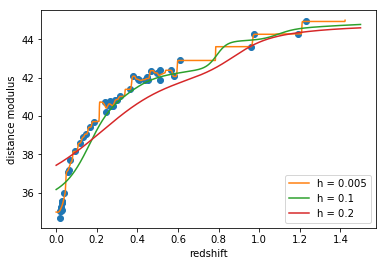

In [17]:
from astroML.linear_model import NadarayaWatson
import astroML
print astroML.__version__
pl.clf()
#pl.plot(z, mu,"o", markersize = 3, alpha = 0.5)
pl.plot(X, y,"o")

hs = [0.005, 0.1, 0.2]
for h in hs:
    model = NadarayaWatson ("gaussian", h = h)
    model.fit(X, y.flatten())

    print X.shape, y.shape, x_grid.shape
    y_grid = model.predict(x_grid)

    pl.plot(x_grid, y_grid, label = "h = " + str(h))

pl.xlabel ("redshift")
pl.ylabel("distance modulus")
pl.legend(loc = "lower right")
pl.show()


## Gaussian Process Regression

A _Gaussian process_ (GP) is a collection of random variables in parameter space such that all its sub-sets follow a joint Gaussian distribution. In other words, for any set $S$, a GP on $S$ is a set of random variables $\{Z_t: t\in S\}$ such that $\forall n \in \mathbb{N}, \forall t_1, \cdots, t_n \in S$, $(Z_{t_1}, \ldots, Z_{t_n})$ (called finite dimensional distributions) is multivariate Gaussian distributed.

* Example 1: multivariate Gaussian (trivial). 
 * $S = \{1, \ldots, d\}$, $Z_t$ follows a Gaussian distribution. 
 * Then any vector $(Z_1, \cdots, Z_n)\in \mathbb{R}^d$ will be multivariate Gaussian distributed.
* Example 2: random lines. 
 * $S = \mathbb{R}$, $Z_t = tw$, $w\sim$N(0,1). 
 * Then the finite dimensional distributions can be written as: $(Z_{t_1}, \ldots, Z_{t_n}) = (t_1, \ldots, t_n)w$.
 * Applying the affine transformation property (if $X$ follows a Gaussian distribution, then $AX + B$ follows a Gaussian distribution) we conclude $(Z_{t_1}, \ldots, Z_{t_n})$ is multivariate distributed.

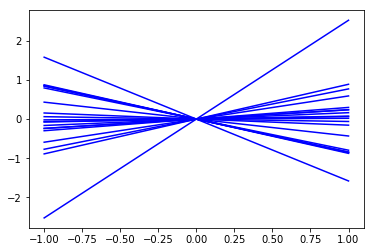

In [18]:
t = np.array([-1, 1])
w = np.random.normal(size = 20)

pl.clf()
for w1 in w:
    pl.plot(t, t*w1, "b")
pl.show()


t =  [6.59417834 1.74757503]
(1000, 2)
[[ 8.22922902e-01  4.69531223e+00]
 [-1.28090430e+01  2.10592246e+00]
 [-1.31801167e+00  7.93195372e-01]
 [ 1.47892249e+00  6.47356106e-01]
 [-4.40578981e+00 -3.76801064e+00]
 [-1.15700075e+00  3.57742441e-01]
 [ 1.49314480e+00 -2.03046096e+00]
 [-6.66209038e-04  6.75337434e-01]
 [ 1.00863543e+01  2.44766631e+00]
 [ 7.25219339e+00  2.10079012e+00]]


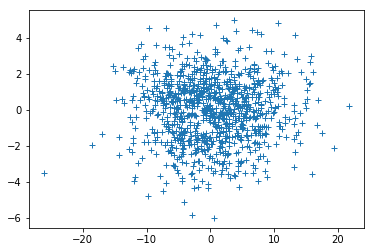

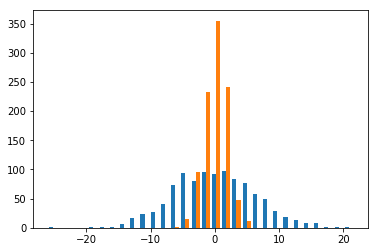

[[39.9092972   0.08269892]
 [ 0.08269892  3.14191508]]


In [20]:
t = np.random.random (2)*10
print "t = ", t
w = np.random.normal(size = (1000, 2))
Zt = w*t
print Zt.shape
print Zt[:10]

pl.clf()
pl.plot(Zt[:, 0], Zt[:, 1], "+")
pl.show()

pl.clf()
pl.hist((Zt[:, 0], Zt[:, 1]), bins = 30)
pl.show()

Cov = np.dot(Zt.transpose(), Zt)/(Zt.shape[0] - 1)
print Cov


### GP Regression

Lets assume our data is drawn from an underlying model $f(x)$. In other words, our data is $\{x_i, y_i = f(x_i) + \sigma_i\}$. The goal of Gaussian Process Regression (GPR) is to obtain an estimate of the mean and variance for a new measurement $x$. In other words, we want to obtain the posterior probability density function $p(f|\{x_i, y_i, \sigma_i\}, x)$. This means we want to calculate statistics over all possible functions $f(x)$ that pass through our observations. This is done by using a "kernel trick" that transforms the function space into a finite covariance space. 

In the Gaussian process viewpoint, we dispense with the parametric model and instead define a prior probability distribution over functions directly. Consider noise processes following a Gaussian distribution

$p(y_i|f_i) = \mathcal{N}(y_i|f_i, \sigma)$,

where we have defined $f_i = f(x_i)$.

As noise is independent for each data point, then

$p(\boldsymbol{y}|\boldsymbol{f}) = \mathcal{N}(\boldsymbol{y}|\boldsymbol{f}, \sigma \boldsymbol{I}_N)$,

where $\boldsymbol{y} = (y_1, y_2, \ldots, y_N)$, $\boldsymbol{f} = (f_1, f_2, \ldots, f_N)$, and $\boldsymbol{I}_N$ is the $N \times N$ unit matrix.

Consider a linear regression model

$\boldsymbol{f} = \boldsymbol{\Phi}\boldsymbol{w}$,

where $\boldsymbol{\Phi}$ is the design matrix, and $\boldsymbol{w}$ is the weight vector.

If we assume $\boldsymbol{w}$ follows a normal distribution 

$p(\boldsymbol{w}) = \mathcal{N}(\boldsymbol{w}|\boldsymbol{0}, \sigma_w \boldsymbol{I})$,

then 

$\mathbb{E}[\boldsymbol{f}] = \boldsymbol{\Phi}\mathbb{E}[\boldsymbol{w}] = \boldsymbol{0}$

$\mathrm{cov}[\boldsymbol{f}] = \mathbb{E}[\boldsymbol{f}\boldsymbol{f}^\top] = \boldsymbol{\Phi}\mathbb{E}[\boldsymbol{w}\boldsymbol{w}^\top]\boldsymbol{\Phi}^\top = \sigma_w\boldsymbol{\Phi}\boldsymbol{\Phi}^\top \equiv \boldsymbol{K}$,

Where $\boldsymbol{K}$ is called the Gram matrix.

The importance of the above result is that the specification of a gaussian process is completed by specifying the covariance through a kernel function

$\mathbb{E}[f_if_j] = k(\boldsymbol{x}_i, \boldsymbol{x}_j)\equiv k_{ij}$.

For the case of linear regression, the kernel is the specified avobe: $k_{ij} = \sigma_w\phi(\boldsymbol{x}_i)^\top\phi(\boldsymbol{x}_j)$, but we could use any kernel we want and the results holds.

Using all this, now we can estimate the distribution of $\boldsymbol{f}$ as

$p(\boldsymbol{f}) = \mathcal{N}(\boldsymbol{f}|\boldsymbol{0}, \boldsymbol{K})$.

and

$p(\boldsymbol{y}) = \int p(\boldsymbol{y}|\boldsymbol{f})p(\boldsymbol{f})d\boldsymbol{f} = \mathcal{N} (\boldsymbol{y}|\boldsymbol{0}, \boldsymbol{C})$,

where 

$C_{ij} = k_{ij} + \sigma\delta_{ij}$

Finally, for a new value $\boldsymbol{x}$ the conditional distribution for the predicted value $y$ is

$p(y|\boldsymbol{x}, \boldsymbol{y}, \{\boldsymbol{x}_i\}) = \mathcal{N}(y|m(\boldsymbol{x}), \sigma(\boldsymbol{x}))$,

where 

$m(\boldsymbol{x}) = \boldsymbol{k}^\top\boldsymbol{C}_N^{-1}\boldsymbol{y}$,

$\sigma^2(\boldsymbol{x}) = c - \boldsymbol{k}^\top\boldsymbol{C}_N^{-1}\boldsymbol{k}$,

$c = k(\boldsymbol{x}, \boldsymbol{x}) + \sigma$,

$\boldsymbol{k}_i = k(\boldsymbol{x}_i, \boldsymbol{x})$.

(highly askable).

The following image was gotten from the book "Statistics, Data Mining, and Machine Learning in Astronomy" and explains this further.

<img src = "http://www.astroml.org/_images/fig_gp_example_1.png">
* Top left: three functions from unconstrained Gaussian process.
* Top right: added two constraints or data points.
* Bottom left: constraints with error bars.
* Bottom right: function space constrained to 20 data points.

(100, 100)


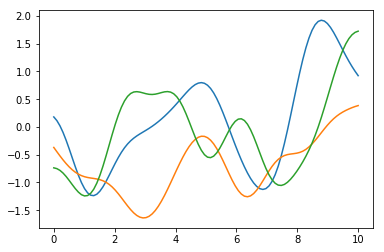

In [22]:
x = np.linspace(0, 10, 100)
h = 1 # by increasing h you're saying distant points are more correlated

mu_x = np.zeros(len(x))
# We use a squared exponential covariance function
C = np.exp(-0.5 * (x - x[:, None]) ** 2 / h**2)
print C.shape
draws = np.random.multivariate_normal(mu_x, C, 3)

pl.clf()
pl.plot(x, draws.T)
pl.show()


/Users/guille/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/guille/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


(34, 50)

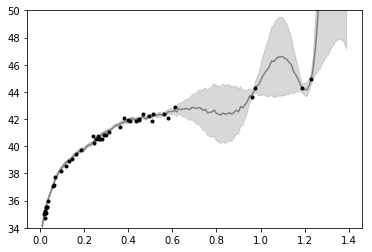

In [84]:
from sklearn.gaussian_process import GaussianProcess
h = 4
# Constrain the mean and covariance
gp1 = GaussianProcess(corr='squared_exponential', theta0 = 1./h**2)
gp1.fit(z_sm[:, None], mu_sm)

x = np.arange(0.01, 1.4, 0.01)
f1, MSE1 = gp1.predict(x[:, None], eval_MSE=True)
f1_err = np.sqrt(MSE1)

pl.clf()
pl.plot(x, f1, '-', color='gray')
pl.fill_between(x, f1 - 2 * f1_err, f1 + 2 * f1_err, color='gray', alpha=0.3)
pl.plot(z_sm, mu_sm, '.k', ms=6)
pl.ylim([34, 50])

(34, 50)

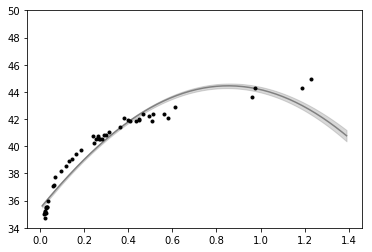

In [77]:
from sklearn.gaussian_process import GaussianProcessRegressor
h = 4

#gp1 = GaussianProcessRegressor()
# Kernel hyperparameters are fit for GaussianProcessRegressor

gp1 = GaussianProcessRegressor(alpha = 1./h**2)
gp1.fit(z_sm[:, None], mu_sm)

x = np.arange(0.01, 1.4, 0.01)
f1, f1_err = gp1.predict(x[:, None], return_std=True)

pl.clf()
pl.plot(x, f1, '-', color='gray')
pl.fill_between(x, f1 - 2 * f1_err, f1 + 2 * f1_err, color='gray', alpha=0.3)
pl.plot(z_sm, mu_sm, '.k', ms=6)
pl.ylim([34, 50])

Now, lets add error bars.

(34, 50)

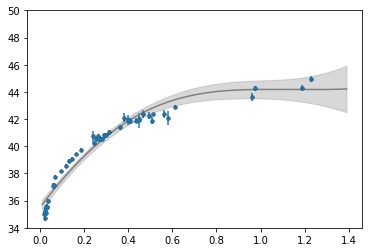

In [90]:
h = 4

# Constrain the mean and covariance
gp1 = GaussianProcess(corr='squared_exponential', theta0 = 0.5/h**2, nugget = s_mu_sm/mu_sm)
#gp1 = GaussianProcessRegressor (alpha = (s_mu_sm/mu_sm)**2)
# Kernel hyperparameters are fit for GaussianProcessRegressor
gp1.fit(z_sm[:, None], mu_sm)

x = np.arange(0.01, 1.4, 0.01)
#f1, f1_err = gp1.predict(x[:, None], return_std=True)
f1, MSE1 = gp1.predict(x[:, None], eval_MSE=True)
f1_err = np.sqrt(MSE1)

pl.clf()
pl.plot(x, f1, '-', color='gray')
pl.fill_between(x, f1 - 2 * f1_err, f1 + 2 * f1_err, color='gray', alpha=0.3)
pl.errorbar(z_sm, mu_sm, yerr = s_mu_sm, fmt = ".")
pl.plot(z_sm, mu_sm, '.k', ms=6)
pl.ylim([34, 50])

## Recal Bias-Variance Tradeoff

Consider a regression model that fits perfectly the *training data* (e.g. high order polynomial or small $h$). This complex model will have a high variance when regressing new data. On the other hand, a model too simple will have very low variance, but at the same time it will have a high bias. Furthermore, there is a tradeoff between bias and variance in terms of the MSE of the model:

$\mathrm{MSE}(x) = \mathbb{E}(f(x) - \hat{f}(x)) = \mathrm{bias}_x^2 + \mathrm{variance}_x + \sigma^2$, where

$\mathrm{bias}_x = \mathbb{E}(\hat{f}(x))- f(x)$

$\mathrm{variance}_x = \mathrm{Var}(\hat{f}(x)) = \mathbb{E}(\hat{f}(x) - \mathbb{E}(\hat{f}(x)))$

$\sigma$ = standard deviation of the noise.

<img src = "http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png/">


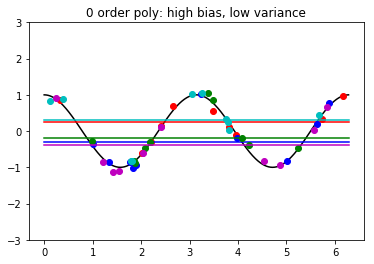

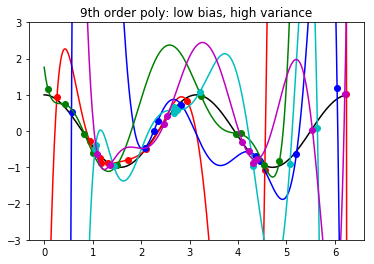

In [79]:
x = np.arange(0, 2*np.pi, 0.01)
y = np.cos(2*x)

sigma_noise = 0.1
N = 5
pl.clf()

pl.plot(x, y, "k")
colors = ['r', 'b', 'g', 'c', "m", "y"]
for i in range(N):
    x_data = np.random.random(10)*2*np.pi
    y_data = np.cos(2*x_data) + np.random.normal(scale = sigma_noise, size = 10)

    p1 = np.polyfit(x_data, y_data, 0)
    p1 = np.poly1d (p1)
    y1 = p1(x)

    pl.plot(x_data, y_data, "o" + colors[i])
    pl.plot (x, y1, colors[i])
pl.title ("0 order poly: high bias, low variance")
pl.ylim ([-3, 3])    
pl.show()

pl.clf()
pl.plot(x, y, "k")
for i in range(N):
    x_data = np.random.random(10)*2*np.pi
    y_data = np.cos(2*x_data) + np.random.normal(scale = sigma_noise, size = 10)

    p10 = np.polyfit(x_data, y_data, 8)
    p10 = np.poly1d (p10)
    y10 = p10(x)

    pl.plot(x_data, y_data, "o" + colors[i])
    pl.plot (x, y10, colors[i])
pl.title ("9th order poly: low bias, high variance")
pl.ylim ([-3, 3])
pl.show()

### Bias-variance tradeoff and cross-validation

In general, the more biased our model is, the lowest the variance, and vice versa. The good news is that we can balance variance and bias using the RMSE over a _test set_. This is the same concept of cross-validation used in classification.



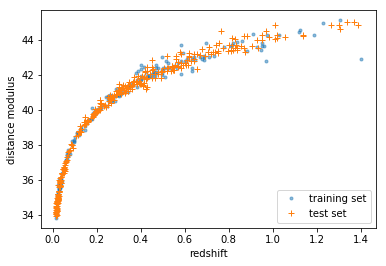

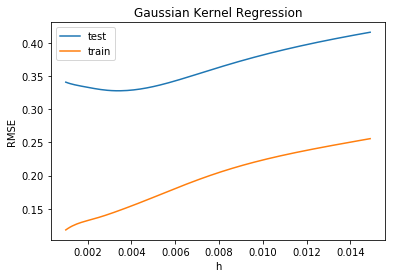

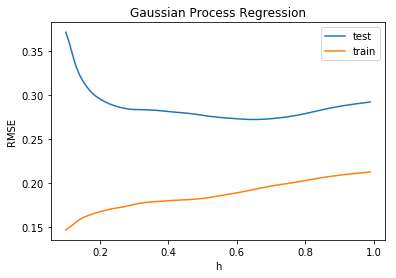

In [104]:
import warnings
warnings.filterwarnings('ignore')

N_train = 200
z_train, mu_train =z[:N_train], mu[:N_train]
z_test, mu_test = z[N_train:], mu[N_train:]


pl.plot(z_train, mu_train, ".", label = "training set", alpha = 0.5)
pl.plot(z_test, mu_test, "+", label = "test set")
pl.xlabel ("redshift")
pl.ylabel("distance modulus")
pl.legend(loc = "lower right")
pl.show()

hs = np.arange(0.001, 0.015, 0.0001)
mse = []
mse_train = []
best_mse = np.inf
for h in hs:
    model = NadarayaWatson ("gaussian", h = h)
    model.fit(z_train[:, None], mu_train)

    y = model.predict(z_test[:, None])
    mse.append(((mu_test - y)**2).sum()/len(y))
    if mse[-1] < best_mse:
        best_kr = model

    y_train = model.predict(z_train[:, None])
    mse_train.append(((mu_train - y_train)**2).sum()/len(y))
    
pl.clf()
pl.plot(hs, np.sqrt(mse), label = "test")
pl.plot(hs, np.sqrt(mse_train), label = "train")
pl.xlabel ("h")
pl.ylabel ("RMSE")
pl.legend(loc = "best")
pl.title ("Gaussian Kernel Regression")
pl.show()


# Now for Gaussian Process Regression
hs = np.arange(0.1, 1, 0.01)
z_train_gp, i_gp = np.unique (z_train, return_index = True)
mu_train_gp = np.array(mu_train) [i_gp]
s_mu_train_gp = np.array(s_mu[:N_train])[i_gp]
mse = []
mse_train = []
best_mse = np.inf
for h in hs:
    gp1 = GaussianProcess(corr='squared_exponential', theta0 = 1./h**2, nugget = s_mu_train_gp/mu_train_gp)
    gp1.fit(z_train_gp[:, None], mu_train_gp)

    x = np.arange(0.01, 1.4, 0.01)
    y = gp1.predict(z_test[:, None], eval_MSE=False)

    mse.append(((mu_test - y)**2).sum()/len(y))
    if mse[-1] < best_mse:
        best_gp = gp1
    
    y_train = gp1.predict(z_train_gp[:, None])
    mse_train.append(((mu_train_gp - y_train)**2).sum()/len(y))
    
pl.clf()
pl.plot(hs, np.sqrt(mse), label = "test")
pl.plot(hs, np.sqrt(mse_train), label = "train")
pl.xlabel ("h")
pl.ylabel ("RMSE")
pl.legend(loc = "best")
pl.title("Gaussian Process Regression")
pl.show()

    

(34, 47)

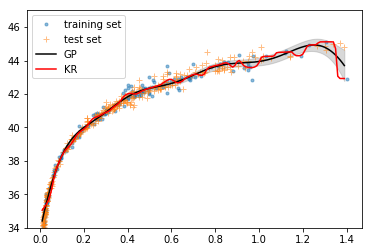

In [108]:
# Now let's see how the regression models worked

x = np.arange(0.01, 1.4, 0.01)
f1, MSE1 = best_gp.predict(x[:, None], eval_MSE=True)
f1_err = np.sqrt(MSE1)
f_kr = best_kr.predict(x[:, None])

pl.clf()
pl.plot(z_train, mu_train, ".", label = "training set", alpha = 0.5)
pl.plot(z_test, mu_test, "+", label = "test set", alpha = 0.5)
pl.plot(x, f1, '-', color='black', label = "GP")
pl.plot(x, f_kr, '-', color='red', label = "KR")
pl.fill_between(x, f1 - 2 * f1_err, f1 + 2 * f1_err, color='gray', alpha=0.3)
pl.legend()
pl.ylim([34, 47])

## Regression Trees

The idea behind regression trees is to iteratively divide the coordinate space linearly into different regions. We associate a real number to each leaf of the tree. The value for each leaf is obtained by minimizing the squared error

$\hat{f}(x) = \mathrm{argmin}_y\sum_{i|x_i\in R(x)}(y-y_i)^2$, where $R(x)$ is the region (or leaf) where $x$ lies. By optimizing this simple expression it can be shown that the constant regressed value for each region is just the mean of the values $y_i$ of the instances that fall in that region.

<img src = "images/TreeRegression.png/">

Given a tree $T$, the sum of squared errors for it is
\begin{equation}
S = \sum_{c\in\mathrm{leaves}(T)}\sum_{i\in c} (y_i - m_c)^2.
\end{equation}

Each node is determined by splitting the coordinate wich minimizes the error.

#### Basic Algorithm:

* Start with a single node containing all points. Calculate $m_c$ and $S$.
* If (all the points in the node have the same value for all the independent variables):
  * stop
* else:
  * search over all binary splits of all variables for the one which will reduce $S$ as much as possible. 
  * If (the largest decrease in $S$ would be less than some threshold $\delta$) or (one of the resulting nodes would
contain less than $q$ points)
    * stop
  * else:
    * take that split, creating two new nodes.
  * for each new node:
      repeat this procedure

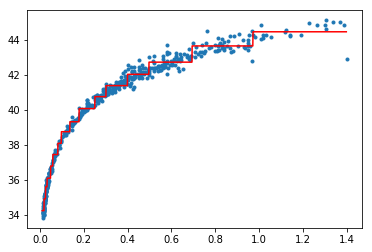

In [109]:
from sklearn import tree

model = tree.DecisionTreeRegressor(max_depth=4)
model.fit(z[:, None], mu)

x = np.arange(0.01, 1.4, 0.001)
y = model.predict(x[:, None])

pl.clf()
pl.plot(z, mu, ".")
pl.plot(x, y, "r")
pl.show()

## Random Forest Regression

Naturally extends from Random Forest Classifiers:

* $n$ trees
* for each tree:
* *  select a bootstrap sample (drawing with replacement)
* * train using m randomly chosen attributes for splitting each node
* $\hat{f}(x) = \frac{1}{n}\sum \hat{f}_i(x)$

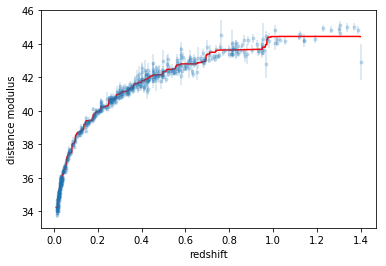

In [110]:
from sklearn.ensemble.forest import RandomForestRegressor

model = RandomForestRegressor(max_depth = 4, n_estimators = 100)
model.fit(z[:, None], mu)

x = np.arange(0.01, 1.4, 0.001)
y = model.predict(x[:, None])

pl.clf()
pl.plot(x, y, "r")
pl.errorbar(df['z'], df['mu'],fmt = ".", yerr = df['sigma_mu'], alpha = 0.2)
#pl.plot(z, mu, ".")
pl.xlabel ("redshift")
pl.ylabel("distance modulus")
pl.show()

Is the forest beeing overfitted?

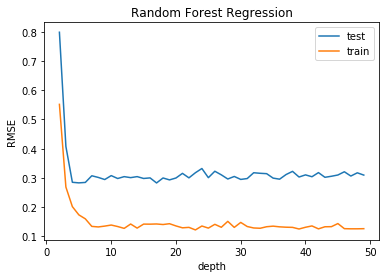

In [111]:
depths = np.arange(2, 50)
mse = []
mse_train = []
for depth in depths:
    model = RandomForestRegressor(max_depth = depth)
    model.fit(z_train[:, None], mu_train)

    y = model.predict(z_test[:, None])
    mse.append(((mu_test - y)**2).sum()/len(y))

    y_train = model.predict(z_train[:, None])
    mse_train.append(((mu_train - y_train)**2).sum()/len(y))
    
pl.clf()
pl.plot(depths, np.sqrt(mse), label = "test")
pl.plot(depths, np.sqrt(mse_train), label = "train")
pl.xlabel ("depth")
pl.ylabel ("RMSE")
pl.legend(loc = "best")
pl.title ("Random Forest Regression")
pl.show()

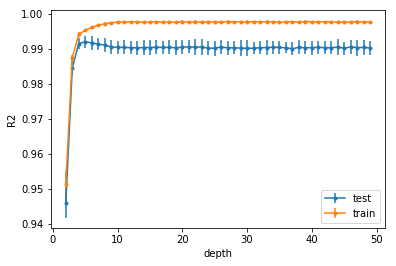

In [112]:
depths = np.arange(2, 50)

ss = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
param_grid = dict(max_depth = depths)
grid = GridSearchCV (RandomForestRegressor(), cv = ss, 
                     param_grid = param_grid)
grid.fit (z[:, np.newaxis], mu)

# We extract the mean scores and stdev for each depth
scores_m_test = grid.cv_results_['mean_test_score']
scores_s_test = grid.cv_results_['std_test_score']
scores_m_train = grid.cv_results_['mean_train_score']
scores_s_train = grid.cv_results_['std_train_score']

pl.clf()
pl.errorbar (depths, scores_m_test, yerr = scores_s_test, fmt = '.', ls = "-", label = "test")
pl.errorbar (depths, scores_m_train, yerr = scores_s_train, fmt = '.', ls = "-", label = "train")
pl.legend(loc = "best")
pl.xlabel ("depth")
pl.ylabel ("R2")
pl.show()

